In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load And Inspect The Data**


In [5]:
data = pd.read_csv("NonLinear_Data.csv")

In [6]:
data.sample(5)

,Feature1,Feature2,Target
56,0.058756,0.882310,1
476,0.282258,0.765351,0
105,0.779954,0.816520,1
547,0.927419,0.674708,0
73,0.192396,0.880848,1


In [7]:
data.shape

(863, 3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  863 non-null    float64
 1   Feature2  863 non-null    float64
 2   Target    863 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 20.4 KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Feature1,863.0,0.503414,0.254967,0.044931,0.292627,0.512673,0.699309,0.998848
Feature2,863.0,0.694304,0.158884,0.402632,0.557018,0.693713,0.830409,0.988596
Target,863.0,0.556199,0.497120,0.000000,0.000000,1.000000,1.000000,1.000000


**Data Visualization**


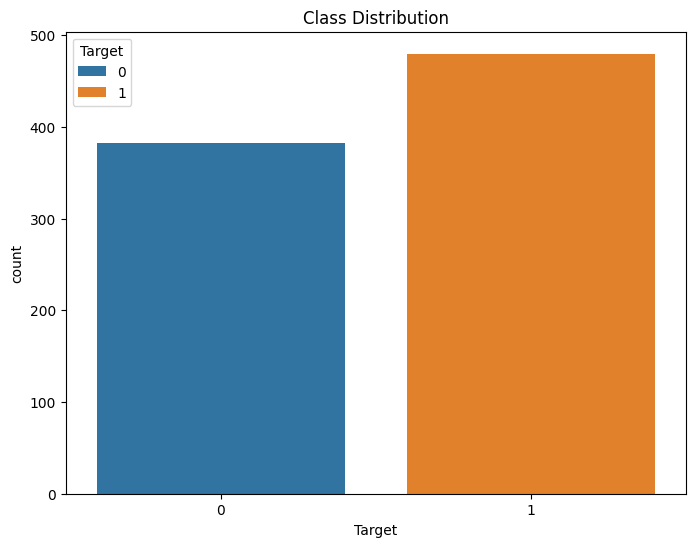

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Target", hue="Target")
plt.title("Class Distribution")
plt.show()

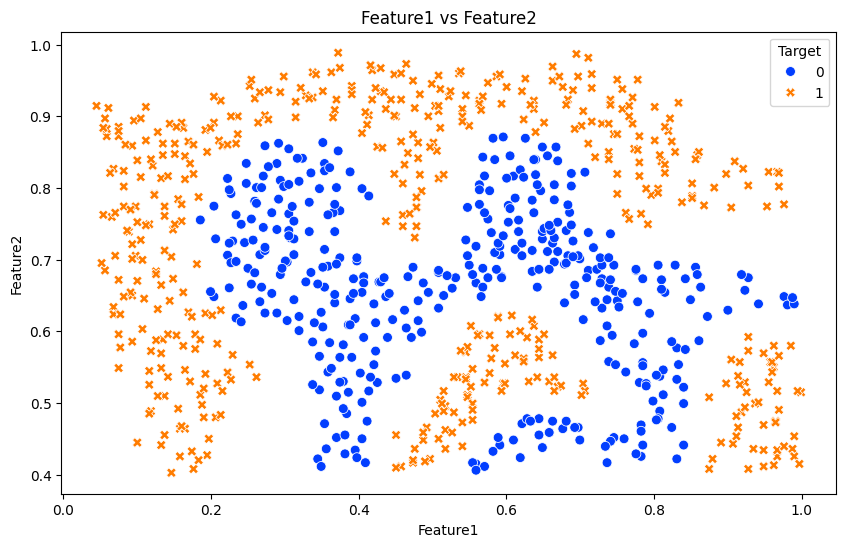

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x="Feature1",
    y="Feature2",
    hue="Target",
    style="Target",
    palette="bright",
    s=50,
)
plt.title("Feature1 vs Feature2")
plt.show()

**Data Preparation**


In [12]:
X = data.drop("Target", axis=1).values
y = data["Target"].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

X.shape, X_train.shape, X_test.shape

((863, 2), (578, 2), (285, 2))

**Train The SVM Model**


In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [16]:
svc = SVC()
param_grid = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["rbf", "poly"],
    "gamma": [0.001, 0.01, 0.1, 1, 10, "scale", "auto"],
}

grid_search_model = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
    verbose=1,
)
grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 'scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [17]:
"Best Parameters:", grid_search_model.best_params_

('Best Parameters:', {'C': 100, 'gamma': 10, 'kernel': 'rbf'})

In [18]:
best_model = grid_search_model.best_estimator_

In [19]:
best_model.fit(X_train, y_train)

SVC(C=100, gamma=10)

**Evaluate The Model**


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
y_test_pred = best_model.predict(X_test)

In [22]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.9719298245614035


In [23]:
"Testing Accuracy", best_model.score(X_test, y_test)

('Testing Accuracy', 0.9719298245614035)

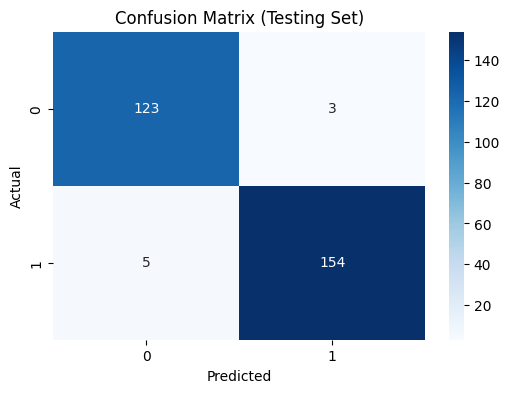

In [24]:
test_conf_mat = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(test_conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Testing Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
print("Classification Report (Testing Set):")
print(classification_report(y_test, y_test_pred))

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       126
           1       0.98      0.97      0.97       159

    accuracy                           0.97       285
   macro avg       0.97      0.97      0.97       285
weighted avg       0.97      0.97      0.97       285



**Check for overfitting by evaluating on the training data**


In [26]:
y_train_pred = best_model.predict(X_train)

In [27]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9705882352941176


In [28]:
"Training Accuracy", best_model.score(X_train, y_train)

('Training Accuracy', 0.9705882352941176)

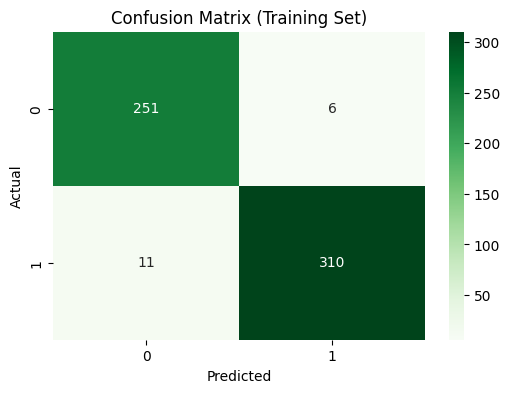

In [29]:
train_conf_mat = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(train_conf_mat, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Training Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
print("Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred))

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       257
           1       0.98      0.97      0.97       321

    accuracy                           0.97       578
   macro avg       0.97      0.97      0.97       578
weighted avg       0.97      0.97      0.97       578



**Visualize the Decision Boundary**


In [34]:
def plot_decision_boundary(
    model,
    X,
    y,
    sv=False,
    scaler=None,
    step_size=0.01,
    xlabel="Feature_1",
    ylabel="Feature_2",
    title="Decision Boundary with Data Points",
):
    # Inverse transform if scaler is provided
    if scaler is not None:
        X = scaler.inverse_transform(X)
    y = y.ravel()

    # Calculate range based on feature median for coverage
    x_range, y_range = 0.5, 0.5
    x_min, x_max = X[:, 0].min() - x_range, X[:, 0].max() + x_range
    y_min, y_max = X[:, 1].min() - y_range, X[:, 1].max() + y_range

    # Define step size for mesh grid
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size)
    )

    # Predict on the mesh grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    if scaler is None:
        Z = model.predict(grid_points).reshape(xx.shape)
    else:
        Z = model.predict(scaler.transform(grid_points)).reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap="Paired", alpha=0.3)

    # Plot data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor="k")

    # Plot support vectors if specified
    if sv:
        sv_points = model.support_vectors_
        plt.scatter(
            sv_points[:, 0],
            sv_points[:, 1],
            facecolors="none",
            edgecolors="k",
            linewidths=1.3,
            label="sv",
        )

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

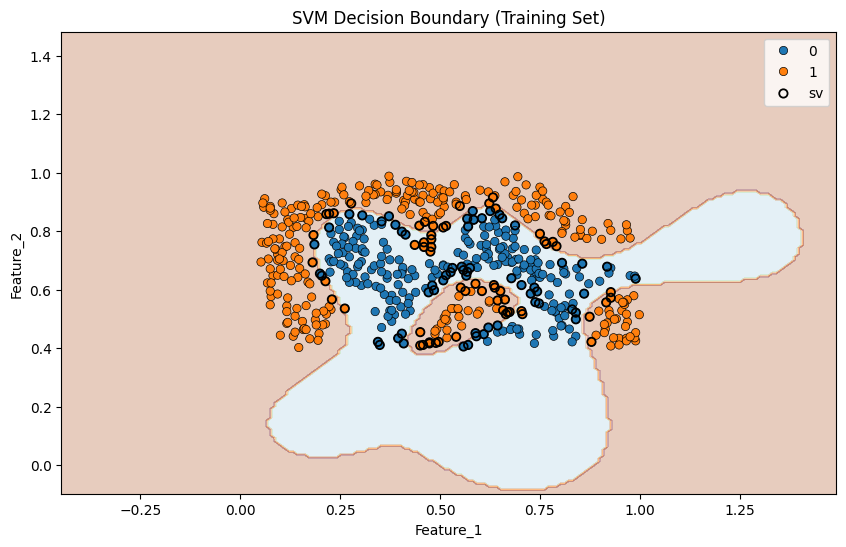

In [35]:
# Plot decision boundary on training data
plot_decision_boundary(
    best_model, X_train, y_train, sv=True, title="SVM Decision Boundary (Training Set)"
)

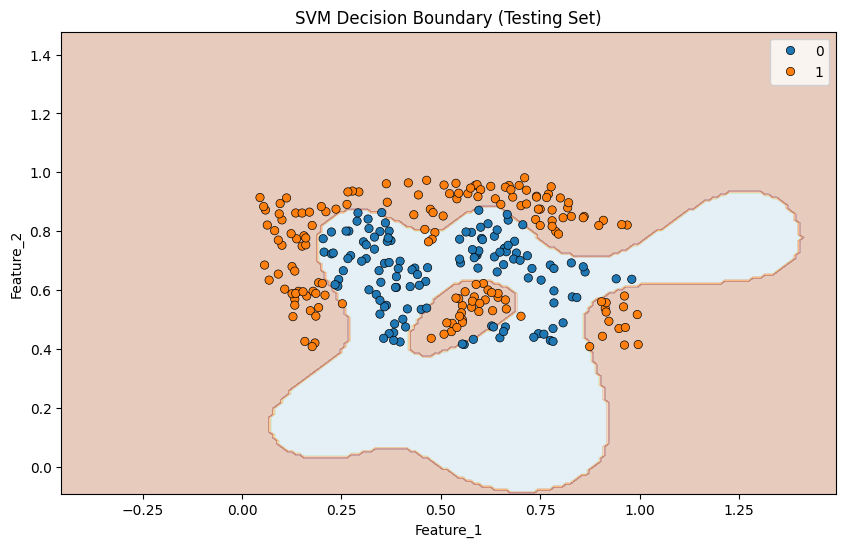

In [36]:
# Plot decision boundary on testing data
plot_decision_boundary(
    best_model, X_test, y_test, title="SVM Decision Boundary (Testing Set)"
)